# Computational tools for social scientists
## A reproducible report with Jupyter and Julia
## Ivan Rudik

# Jupyter

What's a Jupyter notebook?

A web-based computational environment with a bunch of input/output cells that have code, markdown, plots, and other stuff

In [1]:
Load up Julia environment
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating environment at `~/Desktop/git/computational-tools-workshop/Project.toml`


In [2]:
using Plots
x = collect(range(.1, stop = .2, length = 10)) # generate evenly spaced grid
mc = ones(size(x)).*2                          # generate equal length vector of mc=2

# Demand function
demand(p) = p.^(-0.2)/2 .+ p.^(-0.5)/2

demand (generic function with 1 method)

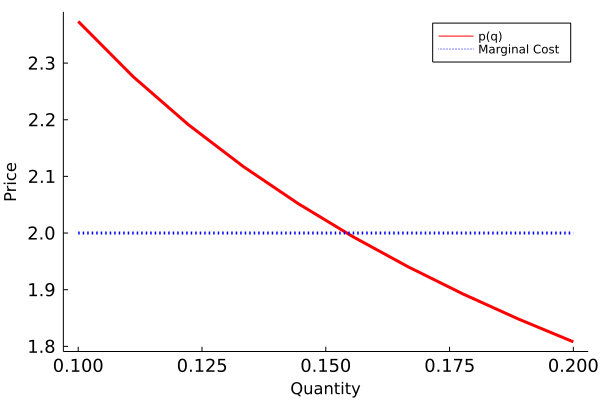

In [3]:
# Get corresponding quantity values at these prices
y = demand(x)
plot(x, [y mc],
    linestyle = [:solid :dot],
    linewidth = [3 3],
    linecolor = [:red :blue],
    tickfontsize = 12,
    grid = :no,
    xlabel = "Quantity",
    ylabel = "Price",
    label = ["p(q)" "Marginal Cost"])

The notebook can be easily exported to html, pdf, latex, etc

Jupyter is named after its three core languages: **Ju**lia, **Py**thon, **R**

# Why use Jupyter notebooks?

## Integrated

The code, description, and output are in a single document

This promotes an iterative, on-the-fly workflow

## Fast

You can spin up a notebook session really quick, in shell just type: ``jupyter notebook``

You can compile a new, single block of code with just `cmd+enter`

## Portable

You run notebooks in a web browser and VSCode with or without an internet connection, send and use notebooks across OS's easily

# How to think about Jupyter

One way to think about it is along a spectrum of integration/speed

## Separate code/document/output
1. Write code
2. Execute code
3. Write document
4. Execute document

## RMarkdown
1. Write code and document
2. Execute code and document

## Jupyter
1. Write code and/or document chunk
2. Execute code and/or document chunk
3. Repeat

# Ways to use Jupyter

## Slides

You can use Jupyter with RISE and reveal.js to make a relatively decent set of slides

Code is embedded so it's dynamic like LaTeX

Takes a little bit of css work to make it look good

Works similarly to RMarkdown slides, but with better integration / on-the-fly capabilities

## Prelim analyses

I'll start new code in Jupyter notebooks since they're quick to spin up and code interactively

Also make for a nice way to share results with co-authors since you can add text / description throughout in a clear way

# How to use a notebook

Finally, how do we navigate and use a notebook?

Exit out of the slides with `alt+r` and we will explore the Jupyter interface

In [4]:
# This is a code cell
# Press cmd+enter to run, shift+enter to run and move to the next cell
foobar = 5+5

println("5+5 = $foobar.")

5+5 = 10.


In [5]:
# Cells can reference variables defined in previous cells

println("Again, 5+5 = $foobar.")

Again, 5+5 = 10.


In [6]:
#You can have slightly more complicated expressions and computations
using Random
Random.seed!(1234321)

A = rand(5, 5) # Random 5x5 array
b = rand(5) # Random 5 element vector
x = A\b # Solve the linear system

5-element Vector{Float64}:
  0.7841295946313819
  0.7513739864773739
  0.8035199588959565
 -1.6359617126881012
  0.5610554369390122

# Reproducibility

Julia makes reproducibility and versioning very easy with the package manager `Pkg`

All you need to do is activate your project `Pkg.activate("directory_here")` and it generates `.toml` files that give the unique GitHub SHA hashes for the package versions and all dependencies

```

[[Adapt]]
deps = ["LinearAlgebra"]
git-tree-sha1 = "0fac443759fa829ed8066db6cf1077d888bb6573"
uuid = "79e6a3ab-5dfb-504d-930d-738a2a938a0e"
version = "2.0.2"

[[ColorSchemes]]
deps = ["ColorTypes", "Colors", "FixedPointNumbers", "Random", "StaticArrays"]
git-tree-sha1 = "7a15e3690529fd1042f0ab954dff7445b1efc8a5"
uuid = "35d6a980-a343-548e-a6ea-1d62b119f2f4"
version = "3.9.0"
```

# Reproducibility

Others can instantiate your project quickly with `Pkg.instantiate()` as in the top code cell

Atom/VSCode integrate with GitHub making version control very easy as well

VSCode also integrates well with Jupyter (wrote this notebook using VSCode!)

![github in atom](images/atom_github.png)

# What is Julia?

Distinctive aspects of Julia's design include a type system with parametric polymorphism in a **dynamic programming language**; with **multiple dispatch** as its core programming paradigm [...] Julia uses a **just-in-time (JIT) compiler** that is referred to as "just-ahead-of-time" (JAOT) in the Julia community, as Julia compiles (on default settings) to machine code before running it.

# Language characteristics

**Dynamically typed:** Julia doesn't need types to be known until runtime (Julia, R, MATLAB, Python)
- All of these languages you can code interactively in the IDE/REPL

**Statically typed:** These languages enforce type at compile time, typically need to be declared (C++, Java, FORTRAN)

**Compiled:** Julia is translated to machine code by a **just-in-time** compiler, makes it faster than intepreted languages like R or Python (Julia, C variants, Java, FORTRAN)
- Julia typically gains its speed after a pre-compile of your functions

**Interpreted:** These langauges execute instructions freely without being compiled beforehand. This gives a lot of flexibility, allows for more interactive coding.

This combination of dynamic + compiled is relatively rare and lets you have speed of C/FORTRAN with the interactiveness and flexibility of R, Python, Stata (interpreting code at runtime has a lot of overhead $\rightarrow$ slow)

This does come with some costs of **needing to know what you're doing**

If you code without thinking you'll just get R or Python speed (but imo still better coding syntax)

# Generic coding infrastructure

Speed in a dynamically typed language comes from letting the compiler know types will be stable $\rightarrow$ it can compile type specific functions

This seems tricky if we don't want to declare types ahead of time but it can be done with generic coding:

In [9]:
 using LinearAlgebra               # necessary for I
 function sametypes(x)
   y = similar(x)                  # creates an array that is `similar` to x, use this for preallocating
   z = I                           # creates a scalable identity matrix
   q = ones(eltype(x), length(x))  # one is a type generic array of ones, fill creates the array of length(x)
   y .= z * x + q
   return y
 end

sametypes (generic function with 1 method)

In [10]:
# Generic coding infrastructure
x = [5.5, 7.0, 3.1];
y = [7, 8, 9];
print("x is $(typeof(x)), y is $(typeof(y)).")

x is Vector{Float64}, y is Vector{Int64}.

Let's see the types of the variables throughout the function

In [11]:
@code_warntype sametypes(x)

Variables
  #self#::Core.Const(sametypes)
  x::Vector{Float64}
  q::Vector{Float64}
  z::UniformScaling{Bool}
  y::Vector{Float64}

Body::Vector{Float64}
1 ─      (y = Main.similar(x))
│        (z = Main.I)
│   %3 = Main.eltype(x)::Core.Const(Float64)
│   %4 = Main.length(x)::Int64
│        (q = Main.ones(%3, %4))
│   %6 = y::Vector{Float64}
│   %7 = (z::Core.Const(UniformScaling{Bool}(true)) * x)::Vector{Float64}
│   %8 = (%7 + q)::Vector{Float64}
│   %9 = Base.broadcasted(Base.identity, %8)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1}, Nothing, typeof(identity), Tuple{Vector{Float64}}}
│        Base.materialize!(%6, %9)
└──      return y


In [12]:
@code_warntype sametypes(y)

Variables
  #self#::Core.Const(sametypes)
  x::Vector{Int64}
  q::Vector{Int64}
  z::UniformScaling{Bool}
  y::Vector{Int64}

Body::Vector{Int64}
1 ─      (y = Main.similar(x))
│        (z = Main.I)
│   %3 = Main.eltype(x)::Core.Const(Int64)
│   %4 = Main.length(x)::Int64
│        (q = Main.ones(%3, %4))
│   %6 = y::Vector{Int64}
│   %7 = (z::Core.Const(UniformScaling{Bool}(true)) * x)::Vector{Int64}
│   %8 = (%7 + q)::Vector{Int64}
│   %9 = Base.broadcasted(Base.identity, %8)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{1}, Nothing, typeof(identity), Tuple{Vector{Int64}}}
│        Base.materialize!(%6, %9)
└──      return y


The function maintained the same type throughout given the input types: this is called **type stability**

If `sametypes` gets `Int64` inputs, it knows to use the compiled `Int64` version of the function rather than deciding at runtime $\rightarrow$ significant speed up vs interpreted languages